In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
from PIL import Image

from torchvision.transforms import v2

In [2]:
df = pd.read_csv('public/public.csv')
folderClasses = ['non_globally_sclerotic_glomeruli', 'globally_sclerotic_glomeruli']
df['path'] = df.apply(lambda x: f"public/{folderClasses[x['ground truth']]}/{x['name']}", axis=1)
df.head()

,name,ground truth,path
0,S-2006-005094_PAS_1of2_64552732435c92704a3d37c...,0,public/non_globally_sclerotic_glomeruli/S-2006...
1,S-2006-005094_PAS_1of2_64552732435c92704a3d37c...,0,public/non_globally_sclerotic_glomeruli/S-2006...
2,S-2006-005094_PAS_1of2_64552732435c92704a3d37c...,0,public/non_globally_sclerotic_glomeruli/S-2006...
3,S-2006-005094_PAS_1of2_64552732435c92704a3d37c...,0,public/non_globally_sclerotic_glomeruli/S-2006...
4,S-2006-005094_PAS_1of2_64552732435c92704a3d37d...,0,public/non_globally_sclerotic_glomeruli/S-2006...


In [3]:
df['ground truth'].value_counts()

ground truth
0    4704
1    1054
Name: count, dtype: int64

In [4]:
sizes = None
for path in df['path']:
    img = np.asarray(plt.imread(path))
    if sizes is None:
        sizes = [img.shape]
    else:
        sizes.append(img.shape)

Widths: 711 232.6238845158292
Heights: 733 233.28004794724174


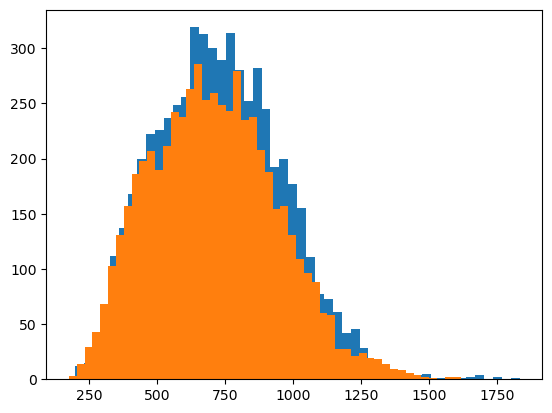

In [5]:
widths = [w for h, w, c in sizes]
heights = [h for h, w, c in sizes]

mean_width = round(np.mean(widths))
mean_height = round(np.mean(heights))

print('Widths:', mean_width, np.std(widths))
print('Heights:', mean_height, np.std(heights))

plt.hist(heights, bins=50)
plt.hist(widths, bins=50)
plt.show()

globally_sclerotic_glomeruli


c:\Users\tatke\Projects\CMIL\env\cmil\lib\site-packages\torchvision\transforms\v2\functional\_type_conversion.py:14: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_numpy.cpp:212.)
  output = torch.from_numpy(np.atleast_3d(inpt)).permute((2, 0, 1)).contiguous()


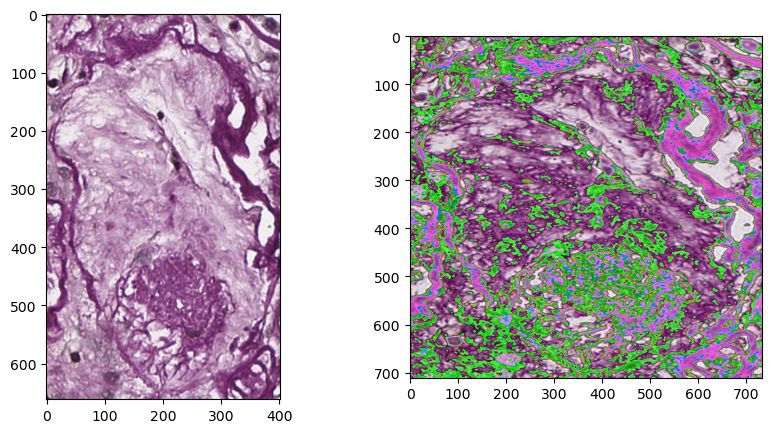

In [8]:
idx = int(input('Enter index: '))
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

name = df.iloc[idx, 0]
label = df.iloc[idx, 1]
img = Image.open(f"public/{folderClasses[label]}/{name}")

out = v2.ToImage()(np.asarray(img))
out = v2.ToDtype(torch.float32, scale=True)(out)
out = v2.Resize((mean_width, mean_height))(out)
out = v2.Normalize(mean = [0.5 for _ in range(4)], std = [0.5 for _ in range(4)])(out)
out = v2.ToPILImage()(out)

print(folderClasses[label])
ax[0].imshow(img)
ax[1].imshow(out)